<a href="https://colab.research.google.com/github/Ib-Programmer/computer_vision_expirement/blob/main/notebooks/Phase1_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Dataset Preparation & Environment Setup
Outdoor Object Detection & Face Recognition System

This notebook handles:
- Environment setup and dependency installation
- Dataset download (LFW, WiderFace, RTTS, BDD100K)
- Preprocessing (resize to 640x640, train/val/test split)
- Data augmentation (fog, rain, low-light, motion blur)
- Dataset statistics and verification

**Runtime**: GPU (T4) recommended for faster processing
**Storage**: Results saved to Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import os
PROJECT_DIR = '/content/drive/MyDrive/computer_vision'
os.makedirs(PROJECT_DIR, exist_ok=True)
print(f"Project directory: {PROJECT_DIR}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project directory: /content/drive/MyDrive/computer_vision


In [10]:
%cd /content
!rm -rf computer_vision_expirement
!git clone https://github.com/Ib-Programmer/computer_vision_expirement.git
%cd computer_vision_expirement
!pip install -q -r requirements.txt
!pip install -q gdown

/content
Cloning into 'computer_vision_expirement'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 52 (delta 22), reused 38 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 49.36 KiB | 3.53 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/computer_vision_expirement


## 1.1 Dataset Download

In [11]:
%cd /content/computer_vision_expirement
!python scripts/download_datasets.py

/content/computer_vision_expirement
Phase 1: Dataset Download
Base directory: /content/computer_vision_expirement
Datasets directory: /content/computer_vision_expirement/datasets

DOWNLOADING: LFW (Labeled Faces in the Wild)
  Trying sklearn.datasets.fetch_lfw_people...
  Downloaded via sklearn: 13233 images
  LFW download complete!
  Location: /content/computer_vision_expirement/datasets/lfw

DOWNLOADING: WiderFace
Downloading...
From (original): https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
From (redirected): https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&confirm=t&uuid=5b3a5ac9-8b06-4f45-8629-644b267b38a7
To: /content/computer_vision_expirement/datasets/widerface/WIDER_train.zip
100% 1.47G/1.47G [00:18<00:00, 77.3MB/s]
  Extracting WIDER_train.zip...
  Extracted to: /content/computer_vision_expirement/datasets/widerface
Downloading...
From (original): https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
From (redirected): https://driv

## 1.2 Preprocessing

In [12]:
%cd /content/computer_vision_expirement
!python scripts/preprocess_data.py

/content/computer_vision_expirement
Phase 1: Data Preprocessing
Target size: (640, 640)
Split ratio: {'train': 0.7, 'val': 0.15, 'test': 0.15}
Chunk size: 200 images
JPEG quality: 90

PREPROCESSING: lfw
  Found 13233 images
  Chunk size: 200 images | JPEG quality: 90

  train: 9263 images in 47 chunks
    train: 100%|██████████████████████████| 9263/9263 [00:59<00:00, 156.08img/s]
    -> processed: 9263 | skipped: 0 | failed: 0

  val: 1984 images in 10 chunks
    val: 100%|████████████████████████████| 1984/1984 [00:11<00:00, 169.59img/s]
    -> processed: 1984 | skipped: 0 | failed: 0

  test: 1986 images in 10 chunks
    test: 100%|███████████████████████████| 1986/1986 [00:11<00:00, 168.93img/s]
    -> processed: 1986 | skipped: 0 | failed: 0

  ────────────────────────────────────────
  lfw DONE
    Total processed: 13233
    Already existed: 0
    Failed/corrupt:  0
    train: 9263 images
    val: 1984 images
    test: 1986 images
  Output: /content/computer_vision_expirement/dat

## 1.3 Augmentation Preview (Visual Only)
Augmentations (fog, rain, low-light, motion blur, combined) are applied **on-the-fly during training** in Phase 3.
This saves ~35GB of disk space and gives better results (different random augmentation every epoch).

Below we generate a small visual preview to verify the augmentations look correct.

/content/computer_vision_expirement


/tmp/ipython-input-686514447.py:12: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  'fog': A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=1.0),
/tmp/ipython-input-686514447.py:13: UserWarning: Argument(s) 'slant_lower, slant_upper' are not valid for transform RandomRain
  'rain': A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1,
/tmp/ipython-input-686514447.py:19: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.5, alpha_coef=0.08, p=1.0),
/tmp/ipython-input-686514447.py:20: UserWarning: Argument(s) 'slant_lower, slant_upper' are not valid for transform RandomRain
  A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1,


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/computer_vision/results/augmentation_preview.png'

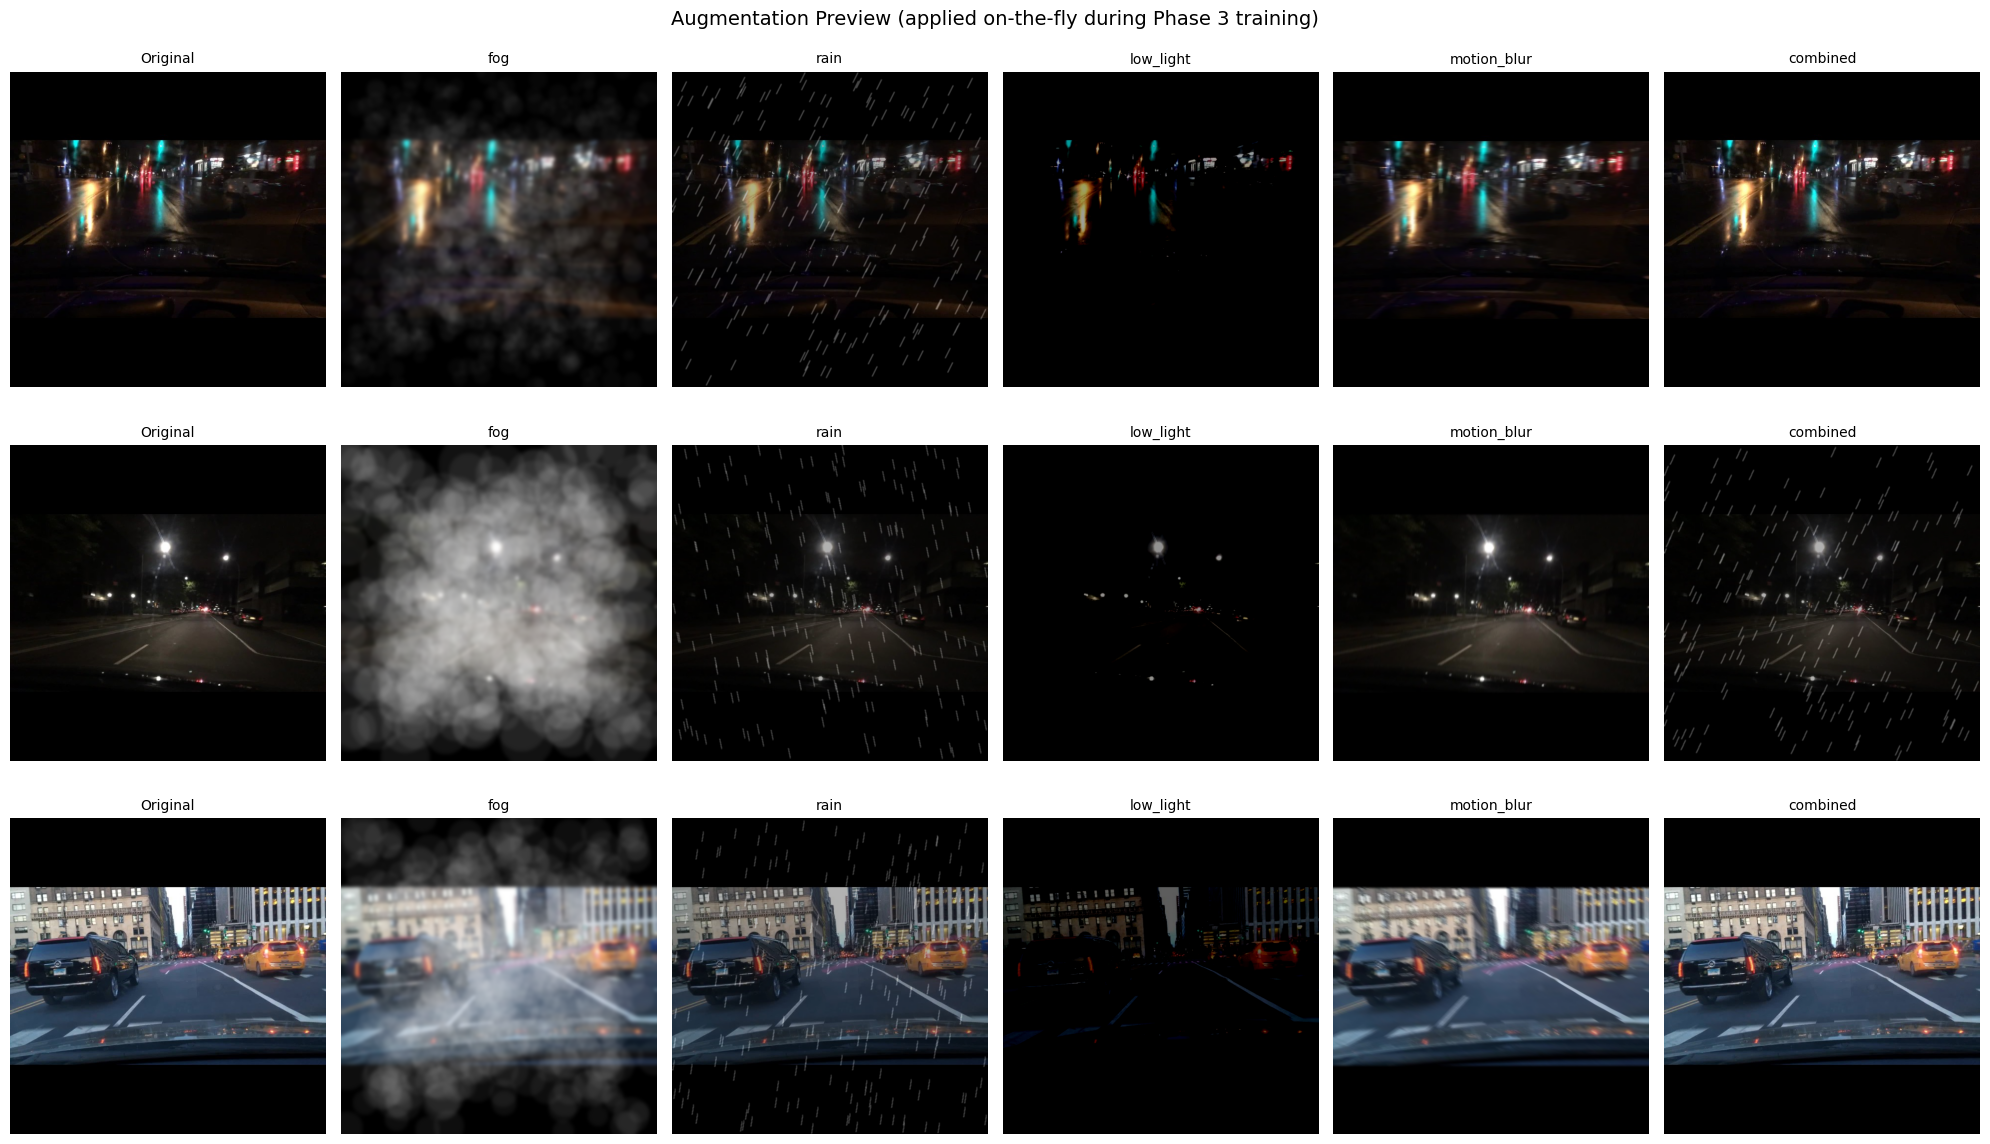

In [13]:
%cd /content/computer_vision_expirement
!pip install -q albumentations

import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import glob

# Define outdoor augmentations (same ones used in Phase 3 training)
augmentations = {
    'fog': A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=1.0),
    'rain': A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1,
                         drop_color=(200, 200, 200), blur_value=3, brightness_coefficient=0.7, p=1.0),
    'low_light': A.RandomBrightnessContrast(brightness_limit=(-0.5, -0.2), contrast_limit=(-0.3, 0.0), p=1.0),
    'motion_blur': A.MotionBlur(blur_limit=(7, 15), p=1.0),
    'combined': A.Compose([
        A.OneOf([
            A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.5, alpha_coef=0.08, p=1.0),
            A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1,
                         drop_color=(200, 200, 200), blur_value=3, brightness_coefficient=0.7, p=1.0),
        ], p=0.5),
        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=(-0.4, -0.1), contrast_limit=(-0.2, 0.0), p=1.0),
            A.MotionBlur(blur_limit=(7, 12), p=1.0),
        ], p=0.5),
    ]),
}

# Find sample images from preprocessed datasets
PROJECT_DIR = '/content/drive/MyDrive/computer_vision'
sample_paths = glob.glob(f'{PROJECT_DIR}/datasets/*_processed/train/*.jpg')[:3]
if not sample_paths:
    sample_paths = glob.glob(f'/content/computer_vision_expirement/datasets/*_processed/train/*.jpg')[:3]

if sample_paths:
    aug_names = list(augmentations.keys())
    fig, axes = plt.subplots(len(sample_paths), len(aug_names) + 1, figsize=(20, 4 * len(sample_paths)))
    if len(sample_paths) == 1:
        axes = [axes]

    for row, img_path in enumerate(sample_paths):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[row][0].imshow(img_rgb)
        axes[row][0].set_title('Original', fontsize=10)
        axes[row][0].axis('off')

        for col, aug_name in enumerate(aug_names, 1):
            transform = augmentations[aug_name]
            if isinstance(transform, A.Compose):
                aug_img = transform(image=img_rgb)['image']
            else:
                t = A.Compose([transform])
                aug_img = t(image=img_rgb)['image']
            axes[row][col].imshow(aug_img)
            axes[row][col].set_title(aug_name, fontsize=10)
            axes[row][col].axis('off')

    plt.suptitle('Augmentation Preview (applied on-the-fly during Phase 3 training)', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{PROJECT_DIR}/results/augmentation_preview.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("Preview saved. Full augmentations run on-the-fly in Phase 3.")
else:
    print("No preprocessed images found. Run preprocessing first.")

## 1.4 Dataset Statistics

In [14]:
%cd /content/computer_vision_expirement
!python scripts/dataset_stats.py

/content/computer_vision_expirement
Phase 1: Dataset Statistics & Verification
Datasets directory: /content/computer_vision_expirement/datasets

RAW DATASET STATISTICS

  LFW
    Path:   /content/computer_vision_expirement/datasets/lfw
    Exists: True
    Images: 13233
    Min size: 250x250
    Max size: 250x250
    Avg size: 250x250
    Subdirs: 1
      - lfw_home: 13233 images

  WIDERFACE
    Path:   /content/computer_vision_expirement/datasets/widerface
    Exists: True
    Images: 16106
    Min size: 1024x359
    Max size: 1024x1544
    Avg size: 1024x866
    Subdirs: 3
      - WIDER_val: 3226 images
      - wider_face_split: 0 images
      - WIDER_train: 12880 images

  RTTS
    Path:   /content/computer_vision_expirement/datasets/rtts
    Exists: True
    Images: 4322
    Min size: 272x177
    Max size: 1200x735
    Avg size: 638x428
    Subdirs: 1
      - RTTS: 4322 images

  BDD100K
    Path:   /content/computer_vision_expirement/datasets/bdd100k
    Exists: True
    Images: 

## 1.5 Save to Google Drive (lightweight — results only)
Datasets stay on Colab's local disk (fast SSD). They get re-downloaded each session (~20 min).
Only small results (stats CSV, augmentation preview) are saved to Drive to preserve space.

In [15]:
import os

PROJECT_DIR = '/content/drive/MyDrive/computer_vision'
RESULTS_DIR = f'{PROJECT_DIR}/results/phase1'
os.makedirs(RESULTS_DIR, exist_ok=True)

# Save only lightweight results to Drive (stats, preview image)
import shutil
import glob

# Copy stats CSV if generated
for f in glob.glob('/content/computer_vision_expirement/datasets/*stats*'):
    shutil.copy(f, RESULTS_DIR)

# Copy augmentation preview
preview = f'{PROJECT_DIR}/results/augmentation_preview.png'
if os.path.exists(preview):
    print(f"Augmentation preview saved: {preview}")

# Show what's on local disk (NOT copied to Drive)
import subprocess
local_size = subprocess.run(['du', '-sh', '/content/computer_vision_expirement/datasets'],
                            capture_output=True, text=True)
print(f"\nLocal datasets (Colab disk, NOT on Drive): {local_size.stdout.strip()}")

drive_size = subprocess.run(['du', '-sh', PROJECT_DIR], capture_output=True, text=True)
print(f"Drive usage: {drive_size.stdout.strip()}")

print(f"""
Phase 1 Complete!

Storage strategy:
  - Datasets stay on Colab local disk (re-download each session, ~20 min)
  - Only trained models + metrics saved to Drive (<1GB total)
  - Augmentations applied on-the-fly in Phase 3 (zero storage)
  - Free Drive (15GB) is more than enough!

Next: Open Phase2_Image_Enhancement.ipynb
""")


Local datasets (Colab disk, NOT on Drive): 29G	/content/computer_vision_expirement/datasets
Drive usage: 12K	/content/drive/MyDrive/computer_vision

Phase 1 Complete!

Storage strategy:
  - Datasets stay on Colab local disk (re-download each session, ~20 min)
  - Only trained models + metrics saved to Drive (<1GB total)
  - Augmentations applied on-the-fly in Phase 3 (zero storage)
  - Free Drive (15GB) is more than enough!

Next: Open Phase2_Image_Enhancement.ipynb



## Next Steps
- Open **Phase2_Image_Enhancement.ipynb** to evaluate enhancement models
- Each phase re-downloads datasets to Colab's fast local disk (~20 min)
- Only results (models, metrics) are saved to Google Drive